# Chart Benchmark Comparison

The purpose of this comparison is to measure each chart libraries performance.

We use dataset from [data.json](./bench/data.json) which has `388,858` data points.

### Disclaimer

- I mostly did not edit code. All I changed files in bench folder is to format code and replace `fetch(./data.json)` with `fetch("https://raw.githubusercontent.com/leeoniya/uPlot/master/bench/data.json")` since data wasn't loaded on browser.
  - Also, added zoom feature in [Echart5.html](./bench/ECharts5.html) to compare the performance between Echarts and uPlot.
- I removed some chart libraries' files since these libraries don't meet our requirements, or library versions are outdated.
- Even though I didn't change logic in files, some chart styles look broken. However, I believe it's not an issue to measure benchmarks.

### Credit

The original code is found in https://github.com/leeoniya/uPlot/tree/master/bench
Thank you

---

## How to Measure Benchmarks

In the [bench folder](./bench/) files, you can find code like `console.time('prep');`, `console.timeEnd('prep');`, so you can see how long it took to render charts. In these files, we measure 2 things.

1. `prep` time: how long it takes to prepare data for charts (ms)
2. `chart` time: how long it takes to render charts (ms)

You can see the respective result in browser console.

The way of measurement is to refresh each chart pages 3 times and get the average.

### Env

- Chrome with private mode
- M1 Mac with Apple M1 Max (10 core), 32 GB mem


## Benchmark Analysis Results

In [1]:
from collections import defaultdict
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


PREP = 'prep'
CHART = 'chart'

apex_chart = defaultdict(list)
canvasjs = defaultdict(list)
chartjs_v2 = defaultdict(list)
chartjs_v3 = defaultdict(list)
echarts = defaultdict(list)
flot = defaultdict(list)
high_charts = defaultdict(list)
lightning_chart = defaultdict(list)
uplot = defaultdict(list)
zing_chart = defaultdict(list)

apex_chart[PREP] = [10.4619140625, 11.3271484375, 17.2861328125]
apex_chart[CHART] = [493.572998046875, 470.474853515625, 472.544921875]

canvasjs[PREP] = [12.177001953125, 21.68505859375, 16.201904296875]
canvasjs[CHART] = [152.01904296875, 115.176025390625, 125.407958984375]

chartjs_v2[PREP] = [13.37109375, 12.052978515625, 20.095947265625]
chartjs_v2[CHART] = [238.996826171875, 259.679931640625, 274.692138671875]

chartjs_v3[PREP] = [13.544921875, 9.3408203125, 12.596923828125]
chartjs_v3[CHART] = [44.683837890625, 44.39892578125, 34.43017578125]

echarts[PREP] = [3.998046875, 3.256103515625, 2.949951171875]
echarts[CHART] = [83.279052734375, 42.6513671875, 41.254150390625]

flot[PREP] = [14.0478515625, 15.177001953125, 10.400146484375]
flot[CHART] = [149.868896484375, 147.578125, 146.922119140625]

high_charts[PREP] = [12.340087890625, 8.28515625, 9.436279296875]
high_charts[CHART] = [89.2080078125, 87.936279296875, 76.756103515625]

lightning_chart[PREP] = [18.936767578125, 28.4267578125, 27.112060546875]
lightning_chart[CHART] = [55.493896484375, 31.718994140625, 34.81005859375]

uplot[PREP] = [5.79296875, 5.31201171875, 5.490966796875]
uplot[CHART] = [37.181884765625, 24.519775390625, 24.887939453125]

zing_chart[PREP] = [11.589111328125, 10.88818359375, 9.2978515625]
zing_chart[CHART] = [670.613037109375, 599.42578125, 570.784912109375]

all_chart_data = [apex_chart, canvasjs, chartjs_v2, chartjs_v3, echarts, flot, high_charts, lightning_chart, uplot, zing_chart]
prep_list = []
chart_list = []
for data in all_chart_data:
  prep_list += [data.get(PREP)]
  chart_list += [data.get(CHART)]

df_dict = {
    'name': ['apex_chart', 'canvasjs', 'chartjs_v2', 'chartjs_v3', 'echarts', 'flot', 'high_charts', 'lightning_chart', 'uplot', 'zing_chart'],
    'prep': prep_list,
    'chart': chart_list
}

df = pd.DataFrame(df_dict)
df['prep_ave'] = df['prep'].apply(np.mean)
df['chart_ave'] = df['chart'].apply(np.mean)
df.style

,name,prep,chart,prep_ave,chart_ave
0,apex_chart,"[10.4619140625, 11.3271484375, 17.2861328125]","[493.572998046875, 470.474853515625, 472.544921875]",13.025065,478.864258
1,canvasjs,"[12.177001953125, 21.68505859375, 16.201904296875]","[152.01904296875, 115.176025390625, 125.407958984375]",16.687988,130.867676
2,chartjs_v2,"[13.37109375, 12.052978515625, 20.095947265625]","[238.996826171875, 259.679931640625, 274.692138671875]",15.173340,257.789632
3,chartjs_v3,"[13.544921875, 9.3408203125, 12.596923828125]","[44.683837890625, 44.39892578125, 34.43017578125]",11.827555,41.170980
4,echarts,"[3.998046875, 3.256103515625, 2.949951171875]","[83.279052734375, 42.6513671875, 41.254150390625]",3.401367,55.728190
5,flot,"[14.0478515625, 15.177001953125, 10.400146484375]","[149.868896484375, 147.578125, 146.922119140625]",13.208333,148.123047
6,high_charts,"[12.340087890625, 8.28515625, 9.436279296875]","[89.2080078125, 87.936279296875, 76.756103515625]",10.020508,84.633464
7,lightning_chart,"[18.936767578125, 28.4267578125, 27.112060546875]","[55.493896484375, 31.718994140625, 34.81005859375]",24.825195,40.674316
8,uplot,"[5.79296875, 5.31201171875, 5.490966796875]","[37.181884765625, 24.519775390625, 24.887939453125]",5.531982,28.863200
9,zing_chart,"[11.589111328125, 10.88818359375, 9.2978515625]","[670.613037109375, 599.42578125, 570.784912109375]",10.591715,613.607910


### Sort by `prep_ave`

In [2]:
df.sort_values(by=['prep_ave'])

,name,prep,chart,prep_ave,chart_ave
4,echarts,"[3.998046875, 3.256103515625, 2.949951171875]","[83.279052734375, 42.6513671875, 41.254150390625]",3.401367,55.728190
8,uplot,"[5.79296875, 5.31201171875, 5.490966796875]","[37.181884765625, 24.519775390625, 24.88793945...",5.531982,28.863200
6,high_charts,"[12.340087890625, 8.28515625, 9.436279296875]","[89.2080078125, 87.936279296875, 76.756103515625]",10.020508,84.633464
9,zing_chart,"[11.589111328125, 10.88818359375, 9.2978515625]","[670.613037109375, 599.42578125, 570.784912109...",10.591715,613.607910
3,chartjs_v3,"[13.544921875, 9.3408203125, 12.596923828125]","[44.683837890625, 44.39892578125, 34.43017578125]",11.827555,41.170980
0,apex_chart,"[10.4619140625, 11.3271484375, 17.2861328125]","[493.572998046875, 470.474853515625, 472.54492...",13.025065,478.864258
5,flot,"[14.0478515625, 15.177001953125, 10.400146484375]","[149.868896484375, 147.578125, 146.922119140625]",13.208333,148.123047
2,chartjs_v2,"[13.37109375, 12.052978515625, 20.095947265625]","[238.996826171875, 259.679931640625, 274.69213...",15.173340,257.789632
1,canvasjs,"[12.177001953125, 21.68505859375, 16.201904296...","[152.01904296875, 115.176025390625, 125.407958...",16.687988,130.867676
7,lightning_chart,"[18.936767578125, 28.4267578125, 27.112060546875]","[55.493896484375, 31.718994140625, 34.81005859...",24.825195,40.674316


<AxesSubplot: xlabel='name'>

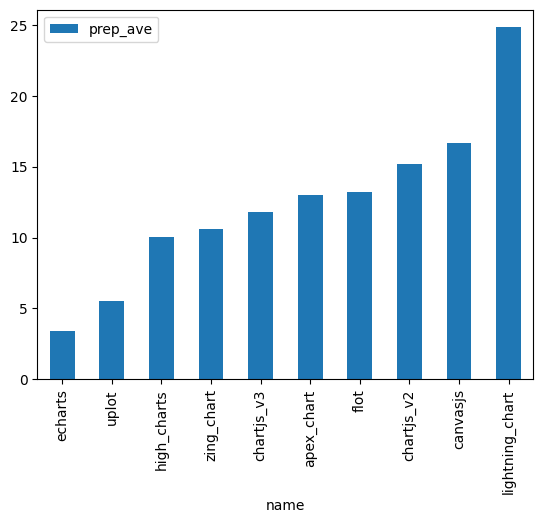

In [3]:
df.sort_values(by=['prep_ave']).plot(x='name', y='prep_ave', kind='bar')

### Sort by `chart_ave`

In [4]:
df.sort_values(by=['chart_ave'])

,name,prep,chart,prep_ave,chart_ave
8,uplot,"[5.79296875, 5.31201171875, 5.490966796875]","[37.181884765625, 24.519775390625, 24.88793945...",5.531982,28.863200
7,lightning_chart,"[18.936767578125, 28.4267578125, 27.112060546875]","[55.493896484375, 31.718994140625, 34.81005859...",24.825195,40.674316
3,chartjs_v3,"[13.544921875, 9.3408203125, 12.596923828125]","[44.683837890625, 44.39892578125, 34.43017578125]",11.827555,41.170980
4,echarts,"[3.998046875, 3.256103515625, 2.949951171875]","[83.279052734375, 42.6513671875, 41.254150390625]",3.401367,55.728190
6,high_charts,"[12.340087890625, 8.28515625, 9.436279296875]","[89.2080078125, 87.936279296875, 76.756103515625]",10.020508,84.633464
1,canvasjs,"[12.177001953125, 21.68505859375, 16.201904296...","[152.01904296875, 115.176025390625, 125.407958...",16.687988,130.867676
5,flot,"[14.0478515625, 15.177001953125, 10.400146484375]","[149.868896484375, 147.578125, 146.922119140625]",13.208333,148.123047
2,chartjs_v2,"[13.37109375, 12.052978515625, 20.095947265625]","[238.996826171875, 259.679931640625, 274.69213...",15.173340,257.789632
0,apex_chart,"[10.4619140625, 11.3271484375, 17.2861328125]","[493.572998046875, 470.474853515625, 472.54492...",13.025065,478.864258
9,zing_chart,"[11.589111328125, 10.88818359375, 9.2978515625]","[670.613037109375, 599.42578125, 570.784912109...",10.591715,613.607910


<AxesSubplot: xlabel='name'>

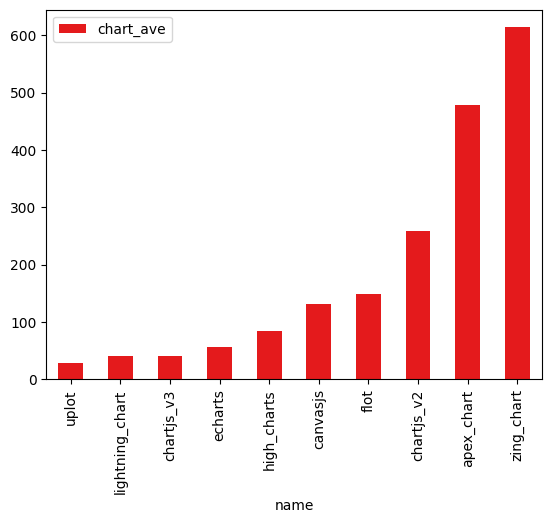

In [5]:
df.sort_values(by=['chart_ave']).plot(x='name', y='chart_ave', kind='bar', colormap='Set1')